In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 定义绘制范围
bounds = [113.7, 22.42, 114.3, 22.8]
# 数据读取
data = pd.read_csv(r'../data-sample/TaxiData-Sample', header=None)
data.columns = [
    'vehicle_num', 'begin_time', 'lon', 'lat', 'open_status', 'speed'
]
#筛选范围内数据
data = data[(data['lon']>bounds[0])&(data['lon']<bounds[2])&(data['lat']>bounds[1])&(data['lat']<bounds[3])]
data.head()

vehicle_num begin_time         lon        lat  open_status  speed
0        22271   22:54:04  114.167000  22.718399            0      0
1        22271   18:26:26  114.190598  22.647800            0      4
2        22271   18:35:18  114.201401  22.649700            0      0
3        22271   16:02:46  114.233498  22.725901            0     24
4        22271   21:41:17  114.233597  22.720900            0     19

In [7]:
# 预处理数据
data_base = data[['lon', 'lat']].round(3).copy()
data_base['count'] =  1
data_base = data_base.groupby(['lon', 'lat'])['count'].count().reset_index()
data_base.sort_values(by='count')
data_base.head()

lon     lat  count
0  113.701  22.779      1
1  113.703  22.779      1
2  113.715  22.781      1
3  113.717  22.780      1
4  113.723  22.769      1

<Axes: >

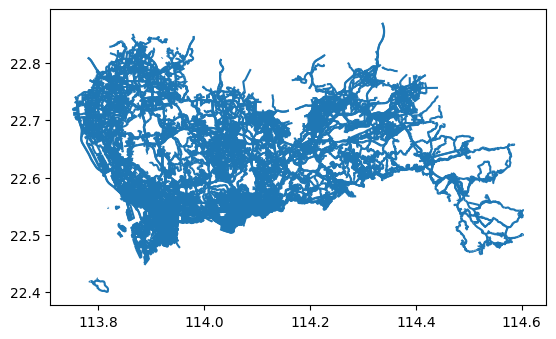

In [8]:
road = gpd.GeoDataFrame.from_file(
    r'../shapefile/shenzhen_osmroad.shp',
    encoding='gbk'
)
road.plot()

In [1]:
import transbigdata as tbd
# 定义api和存储路径
# tbd.set_mapboxtoken('pk.eyJ1IjoiMTMxOTE5OTQwOCIsImEiOiJjbHdveGE1bDUyajBiMmpwcGVyY3ZlYnM4In0.AVDfLBwYn0z2QNpAKQKnvQ')
# tbd.set_imgsavepath(r'D:/Repository/map/')

Set mapboxtoken success
Set imgsavepath success


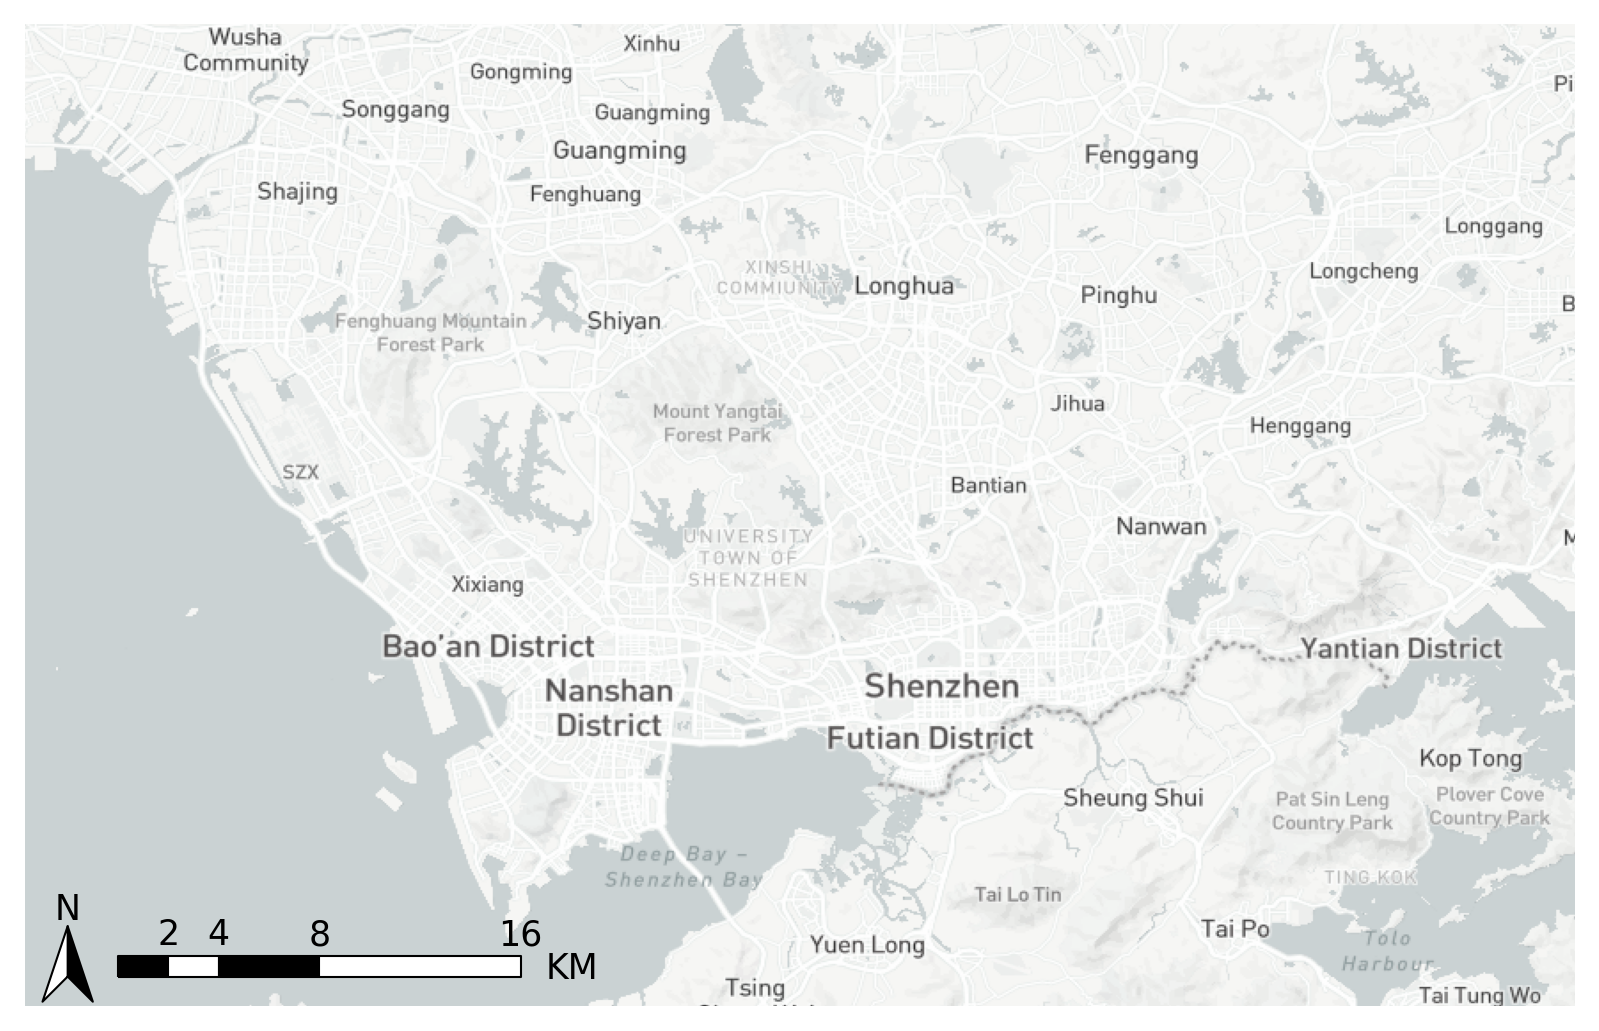

In [10]:
# transbigdata 测试
# Plot Frame
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=250)
ax =plt.subplot(111)
plt.sca(ax)
# Add map basemap
tbd.plot_map(plt, bounds,zoom = 11,style = 4)
# Add scale bar and north arrow
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

(22.42, 22.8)

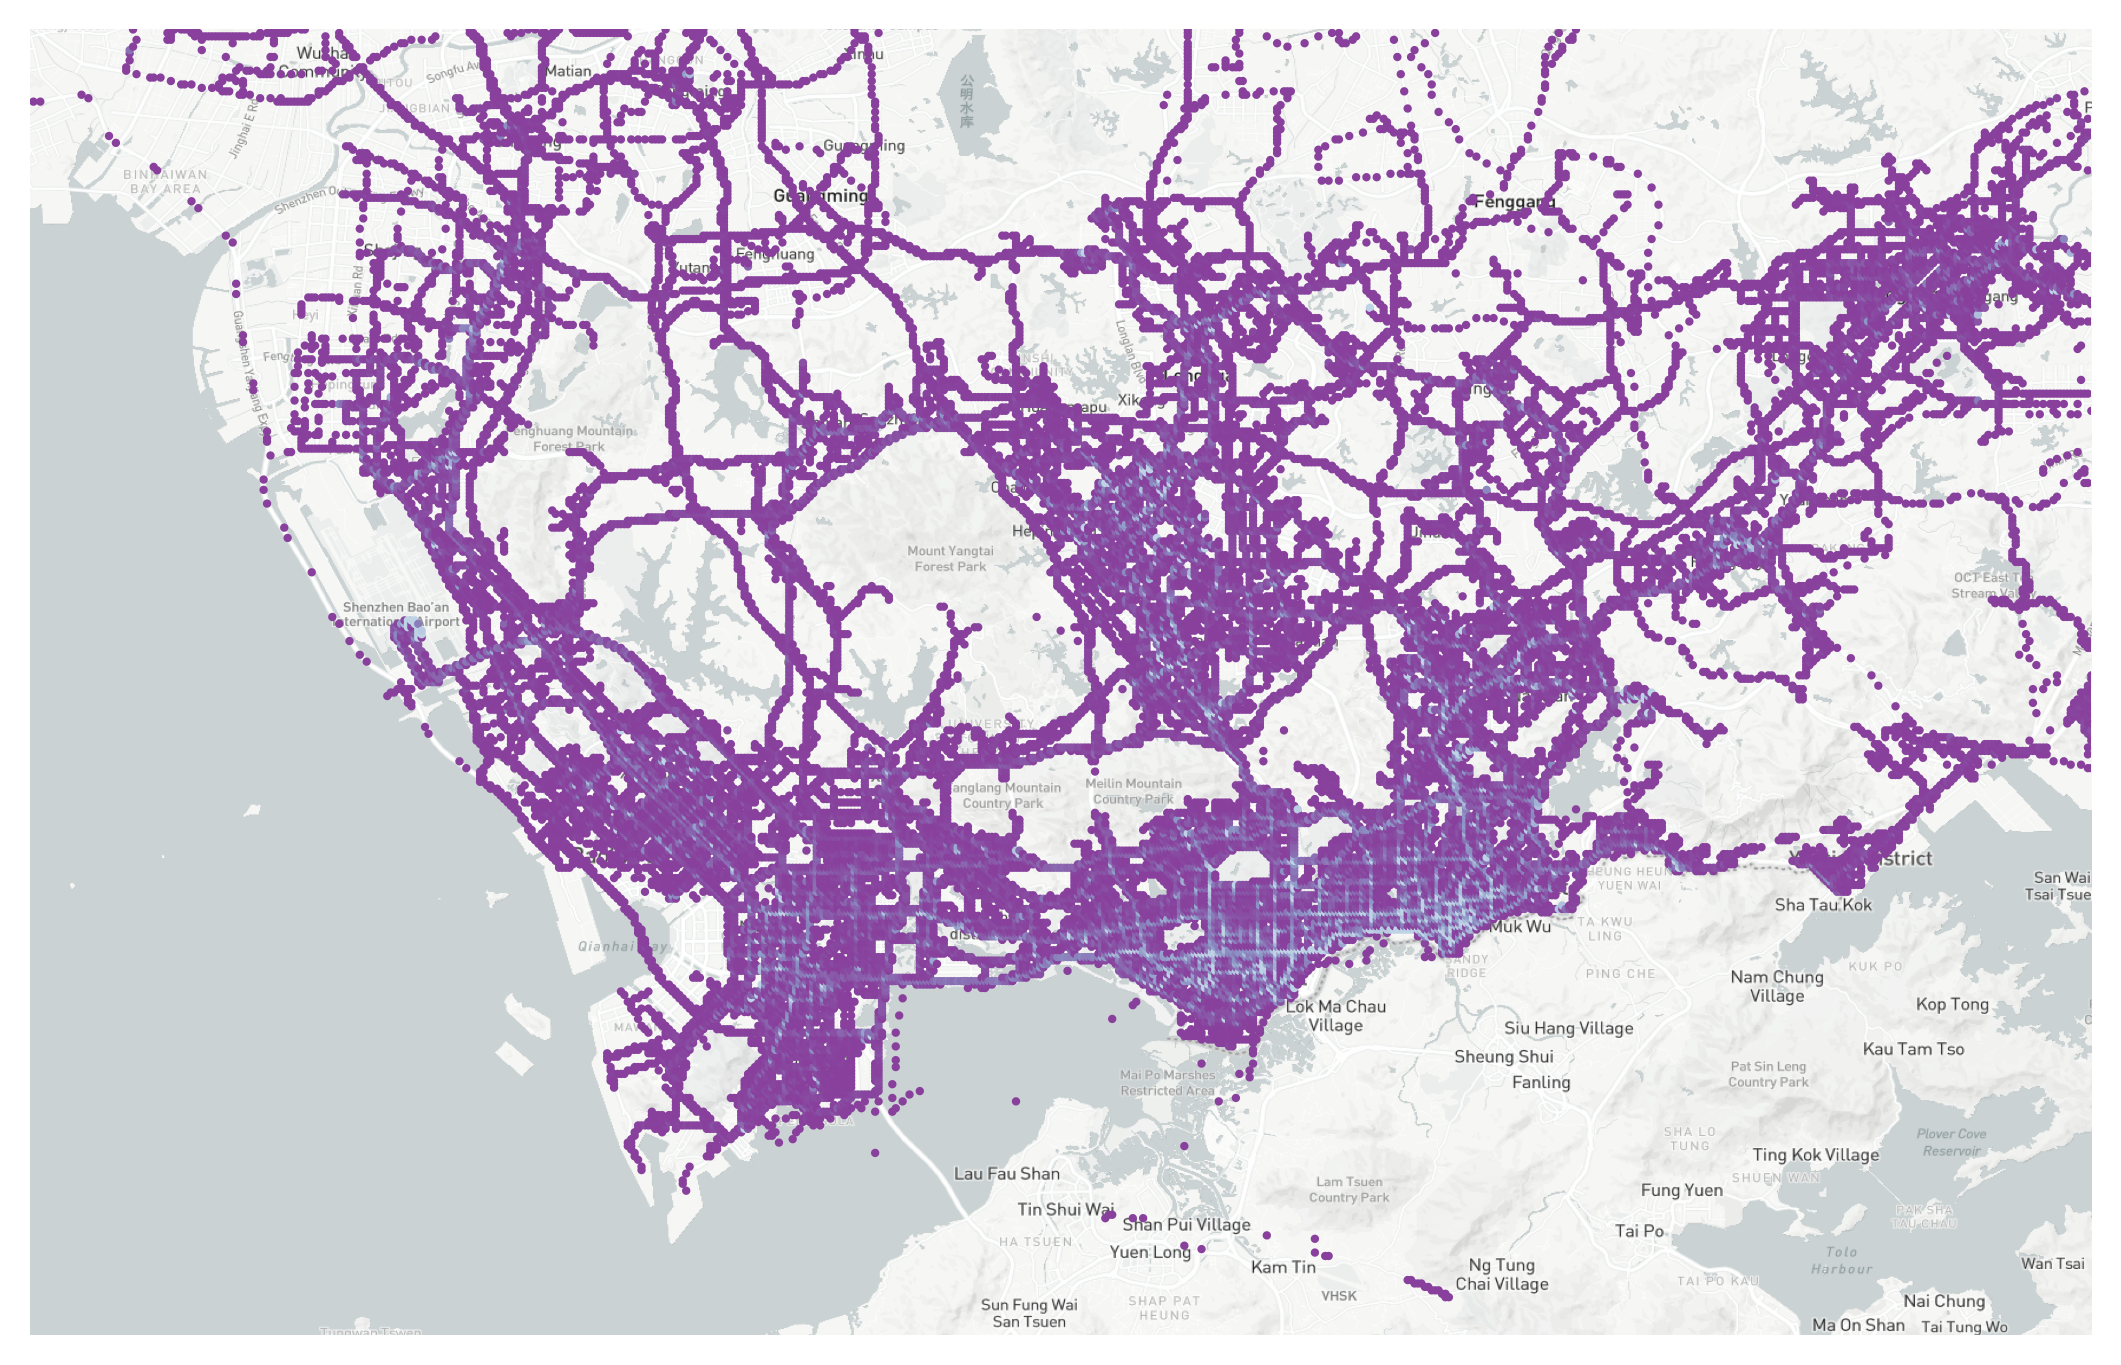

In [12]:
import seaborn as sns
# 绘制散点图
fig = plt.figure(1, (8, 8), dpi=300)
ax = plt.subplot(111)
plt.sca(ax)
# 定义空白边界
fig.tight_layout(rect=(0.05, 0.1, 1, 0.9))
tbd.plot_map(plt, bounds, zoom=12, style=4)
# colorbar
pallete_name = "BuPu"
colors = sns.color_palette('BuPu', 3)
colors.reverse()
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    pallete_name, colors
)
vmax = data_base['count'].quantile(0.99)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
# scatter
plt.scatter(
    data_base['lon'], data_base['lat'],
    s = 1,alpha = 1,c = data_base['count'],
    cmap = cmap,norm=norm
)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

In [16]:
def create_levels(data):
    d = data.pivot(columns='lon', index='lat', values='count').fillna(0)
    z = np.log(d.values)
    x = d.columns
    y = d.index
    return x, y, z, np.linspace(0, z.max(), 25)

C:\Users\13191\AppData\Local\Temp\ipykernel_22168\3670743425.py:3: RuntimeWarning: divide by zero encountered in log
  z = np.log(d.values)


(113.642578125, 114.345703125, 22.350075806124856, 22.836945920943847)

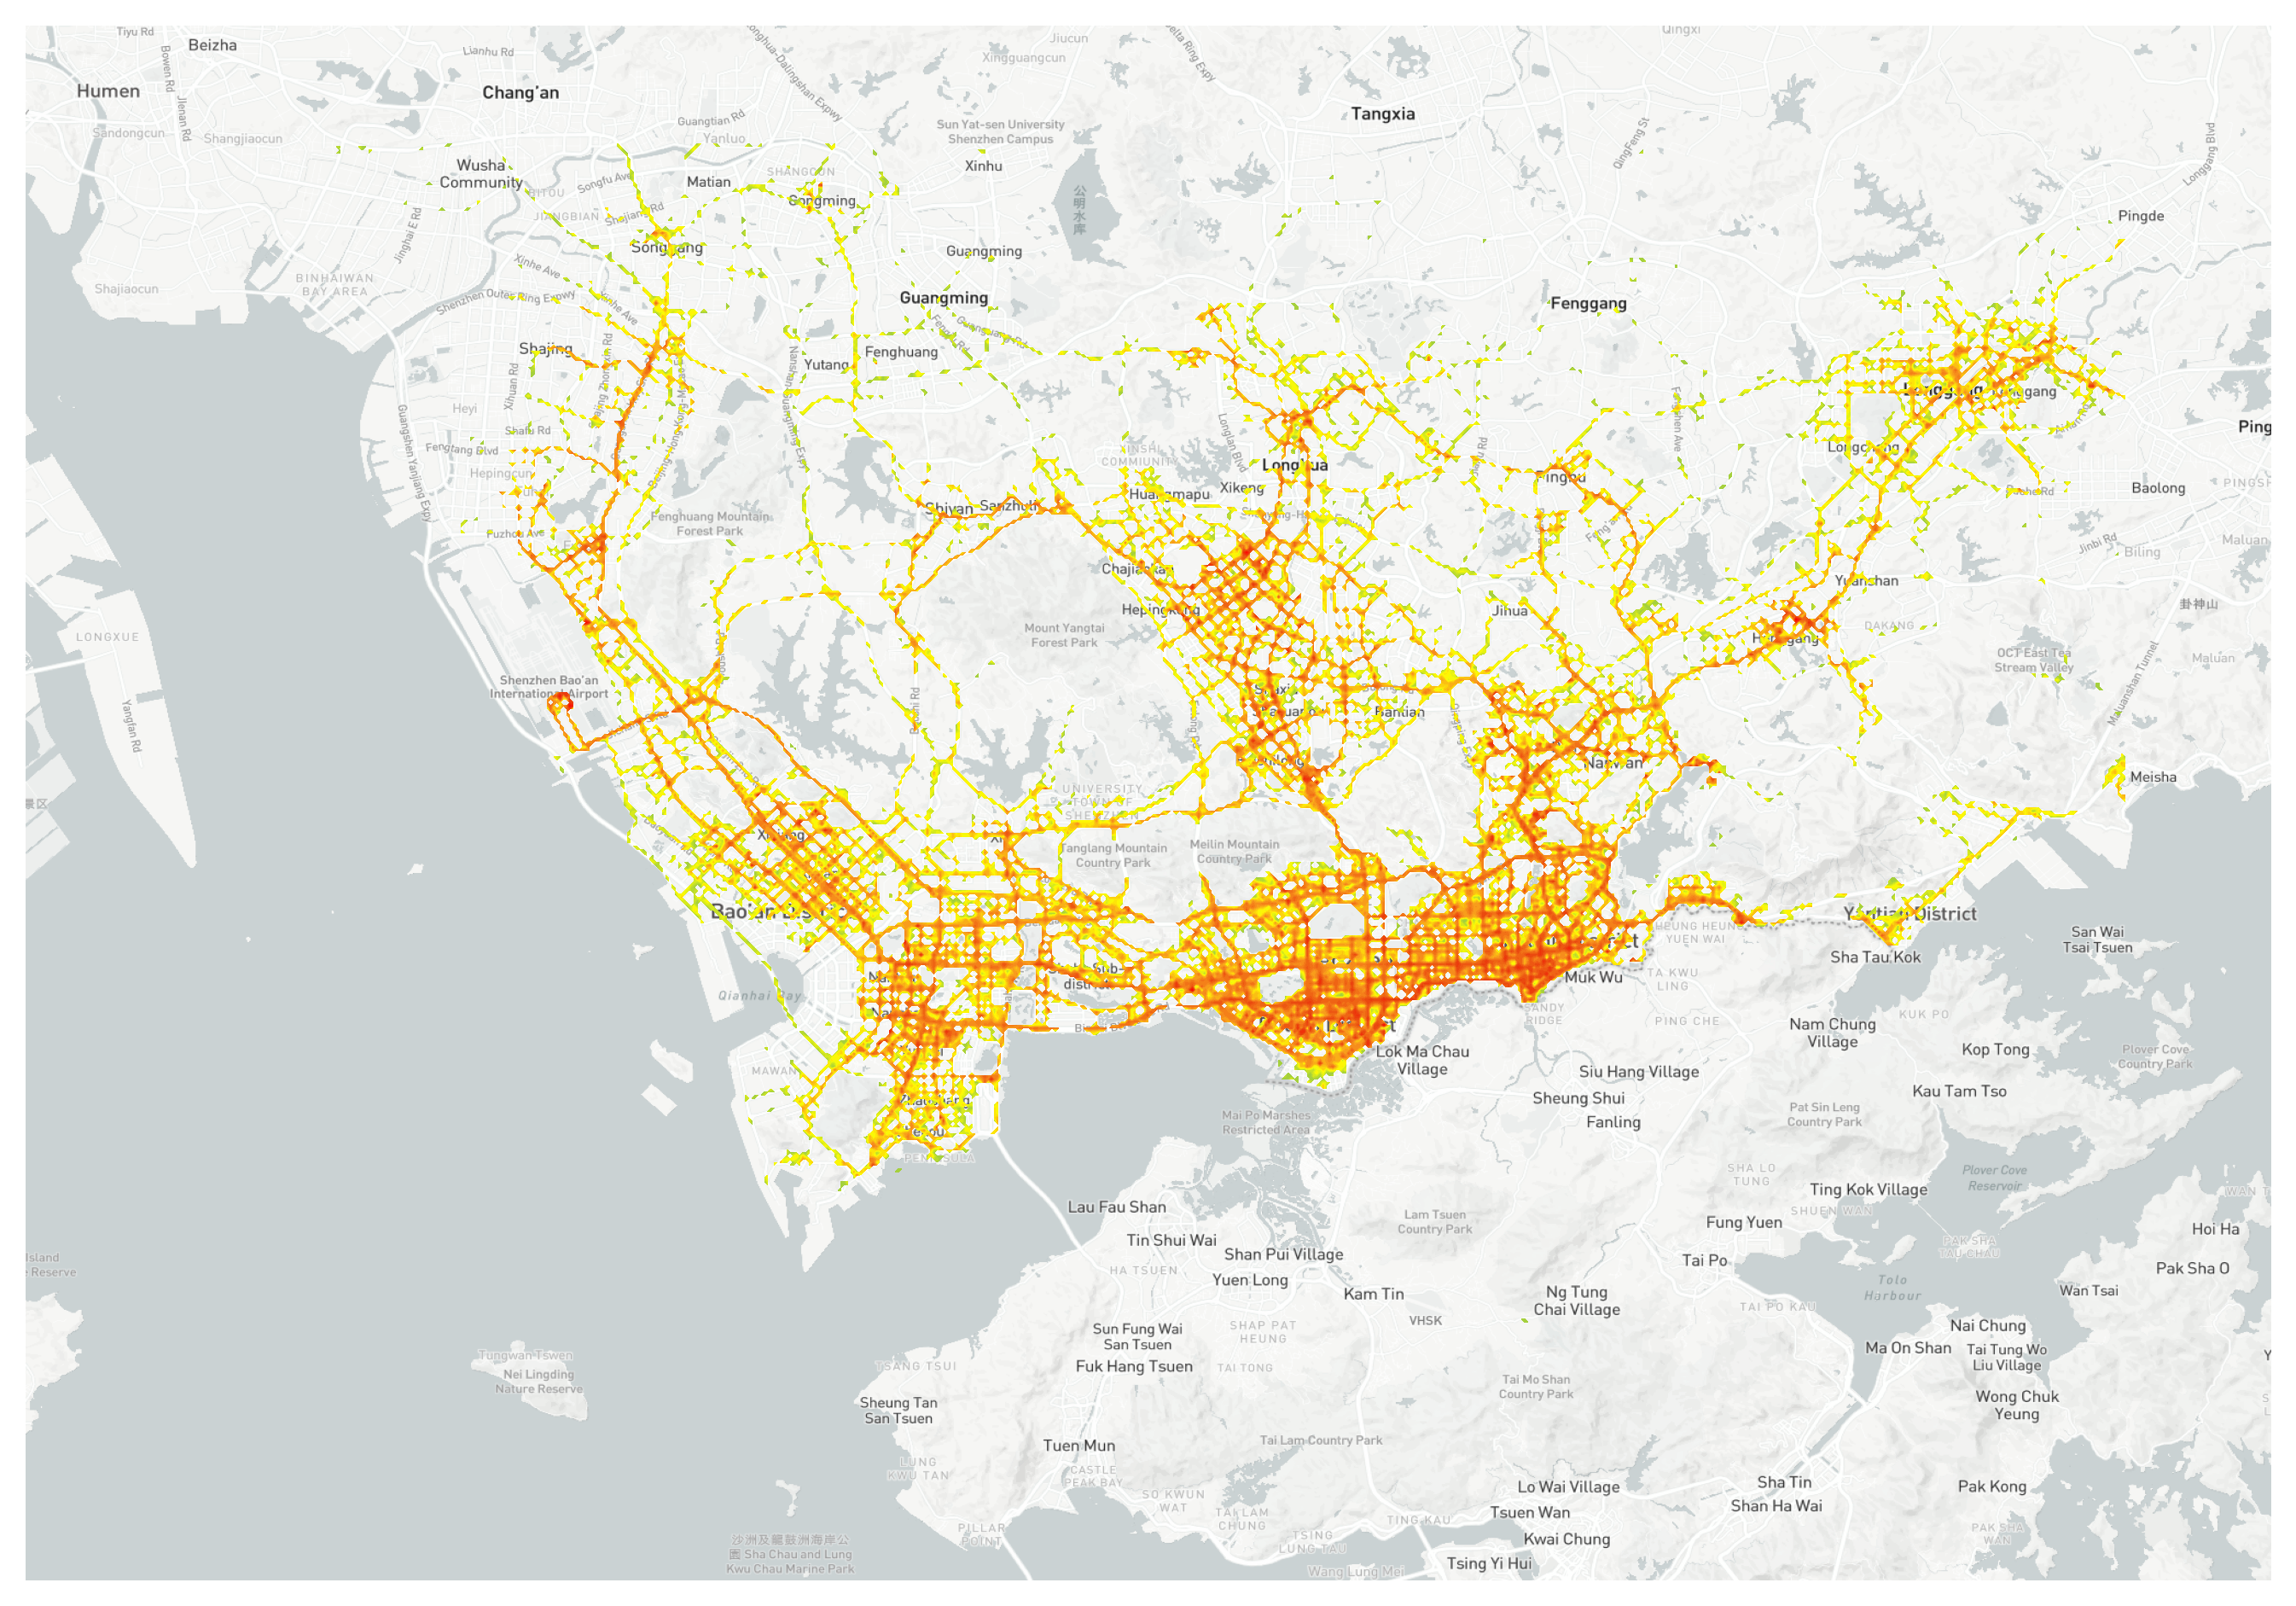

In [21]:
# 绘制热力图
fig = plt.figure(1, (10, 10), dpi=300)
ax = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect=(0.05, 0.1, 1, 0.9))

tbd.plot_map(plt, bounds, zoom=12, style=4)
#colorbar的数据
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)

#绘制热力图
x, y, z, levels = create_levels(data_base)
plt.contourf(x, y, z, levels=levels, cmap=cmap,origin = 'lower')
plt.axis('off')